## **1- Imports & Requirements :**


In [ ]:
import os
Home = os.getcwd()
print(Home)

/content


In [ ]:
# Pip install method (recommended)   Notre Model Yolov8

!pip install ultralytics==8.0.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.8/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## **2- Detector Test :**

In [ ]:
#Starting Image
%cd {Home}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://t4.ftcdn.net/jpg/00/97/58/97/360_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg' save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://t4.ftcdn.net/jpg/00/97/58/97/360_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg locally at 360_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg
image 1/1 /content/360_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg: 448x640 1 cat, 361.9ms
Speed: 2.6ms pre-process, 361.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7


/content


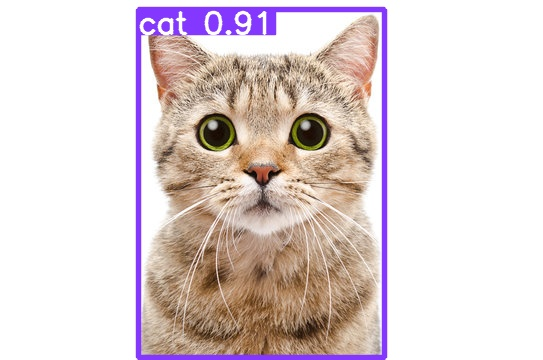

In [ ]:
#Results
%cd {Home}
Image(filename='runs/detect/predict5/360_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg', height=600)

## Roboflow

In [ ]:
!mkdir {Home}/datasets
%cd {Home}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="Vt6XLEfaXcBSvVDljzDs")
project = rf.workspace("avignon-university").project("lettersdetector-xn916")
dataset = project.version(4).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to LettersDetector-4 in yolov8:: 100%|██████████| 254/254 [00:00<00:00, 1925.88it/s]


## Our Training

In [ ]:
%cd {Home}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/LettersDetector-4/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False

/content


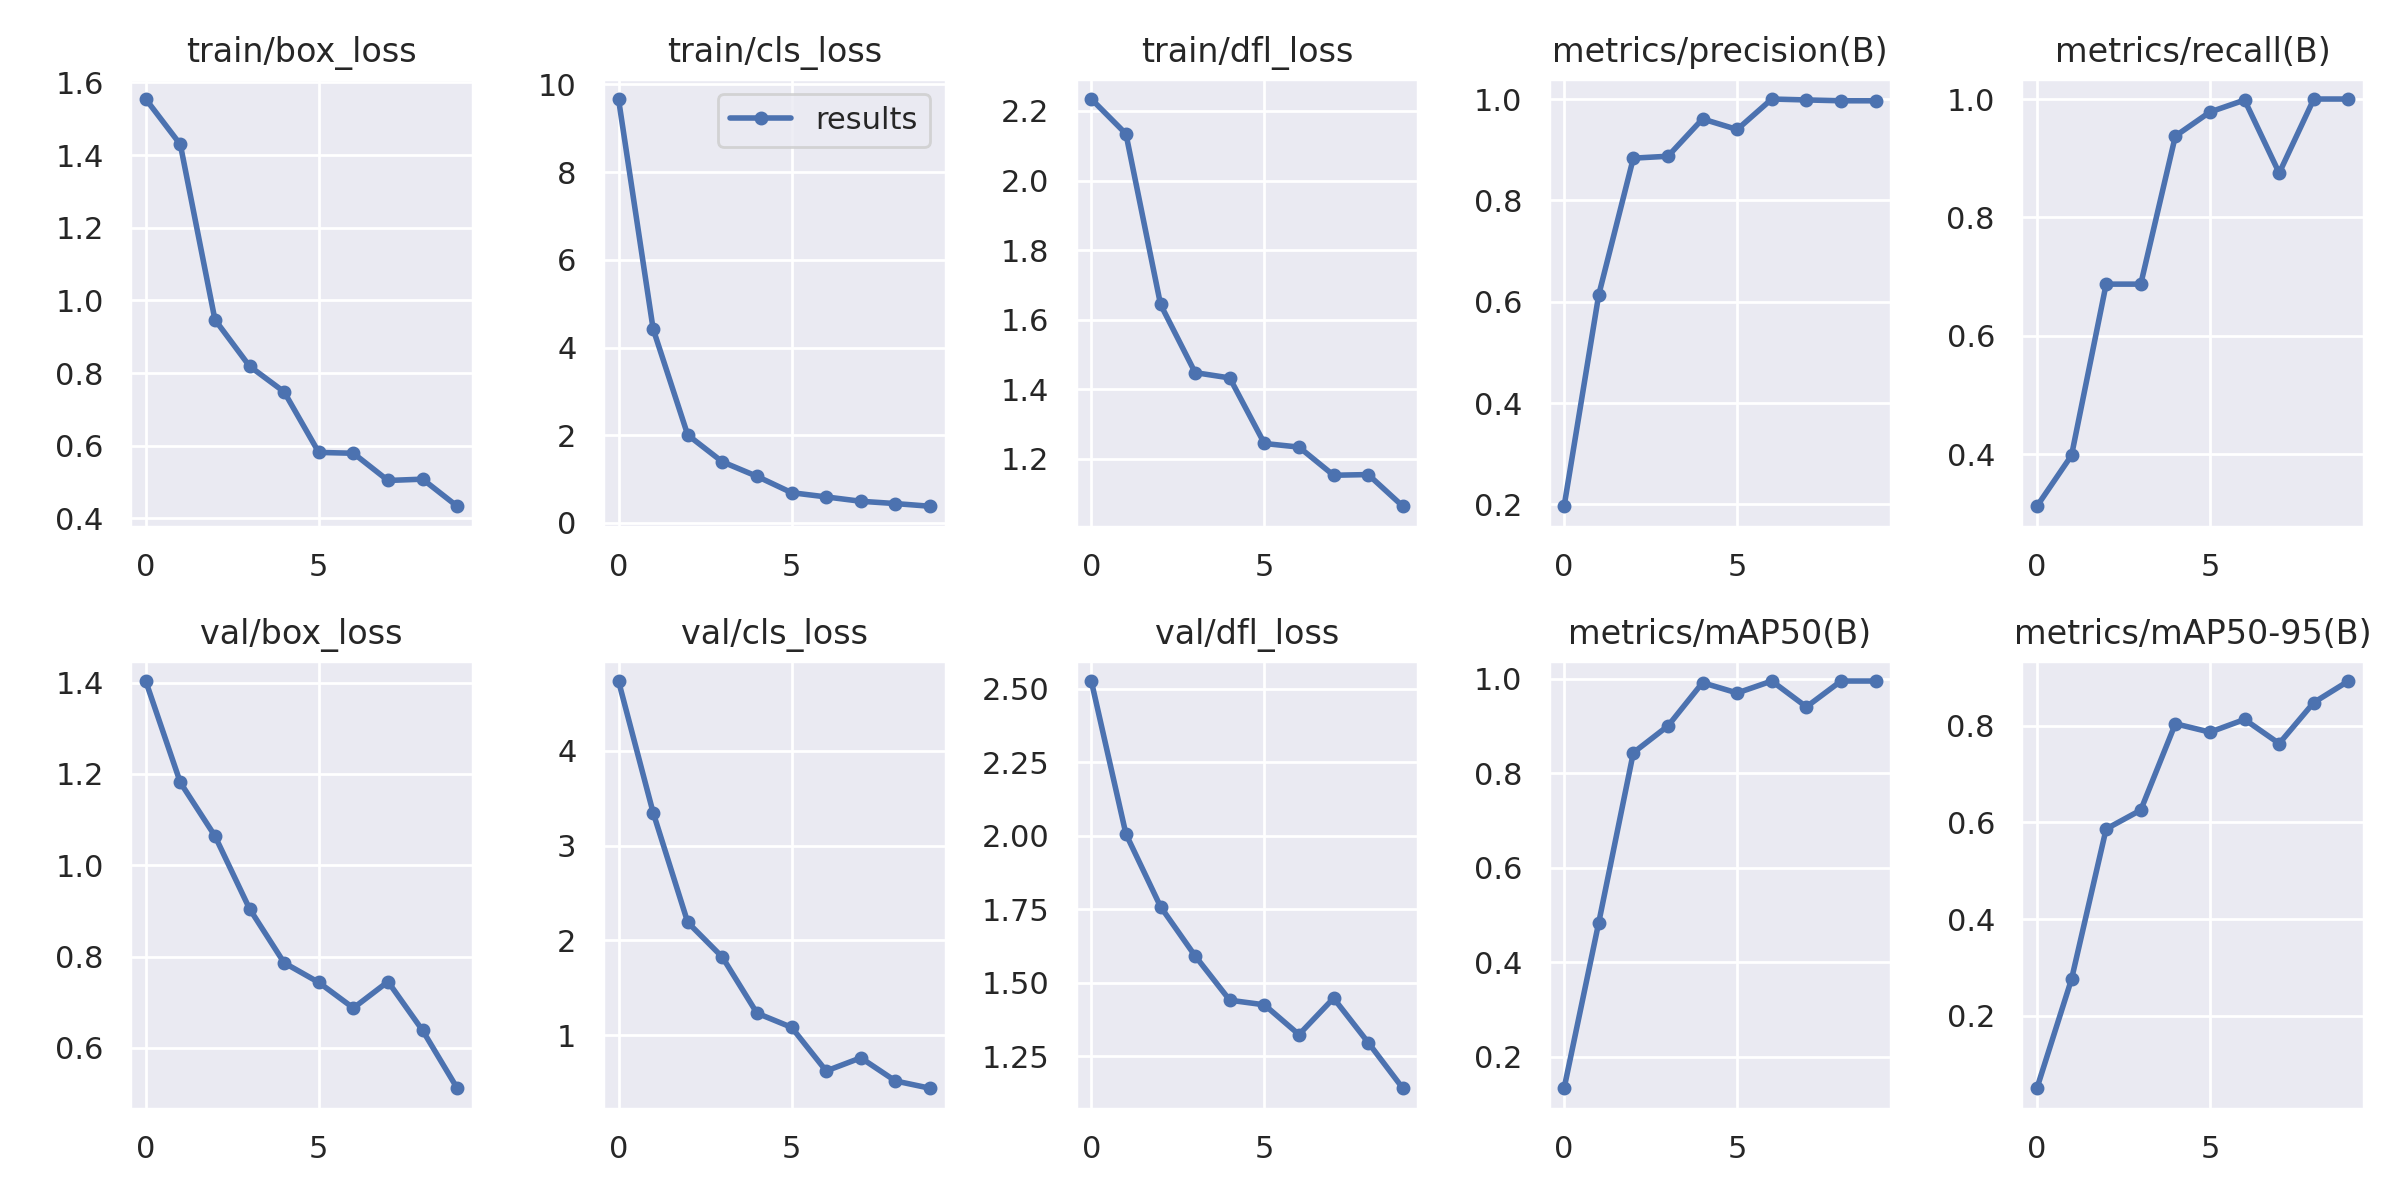

In [ ]:
%cd {Home}

Image(filename=f'{Home}/runs/detect/train7/results.png')

/content


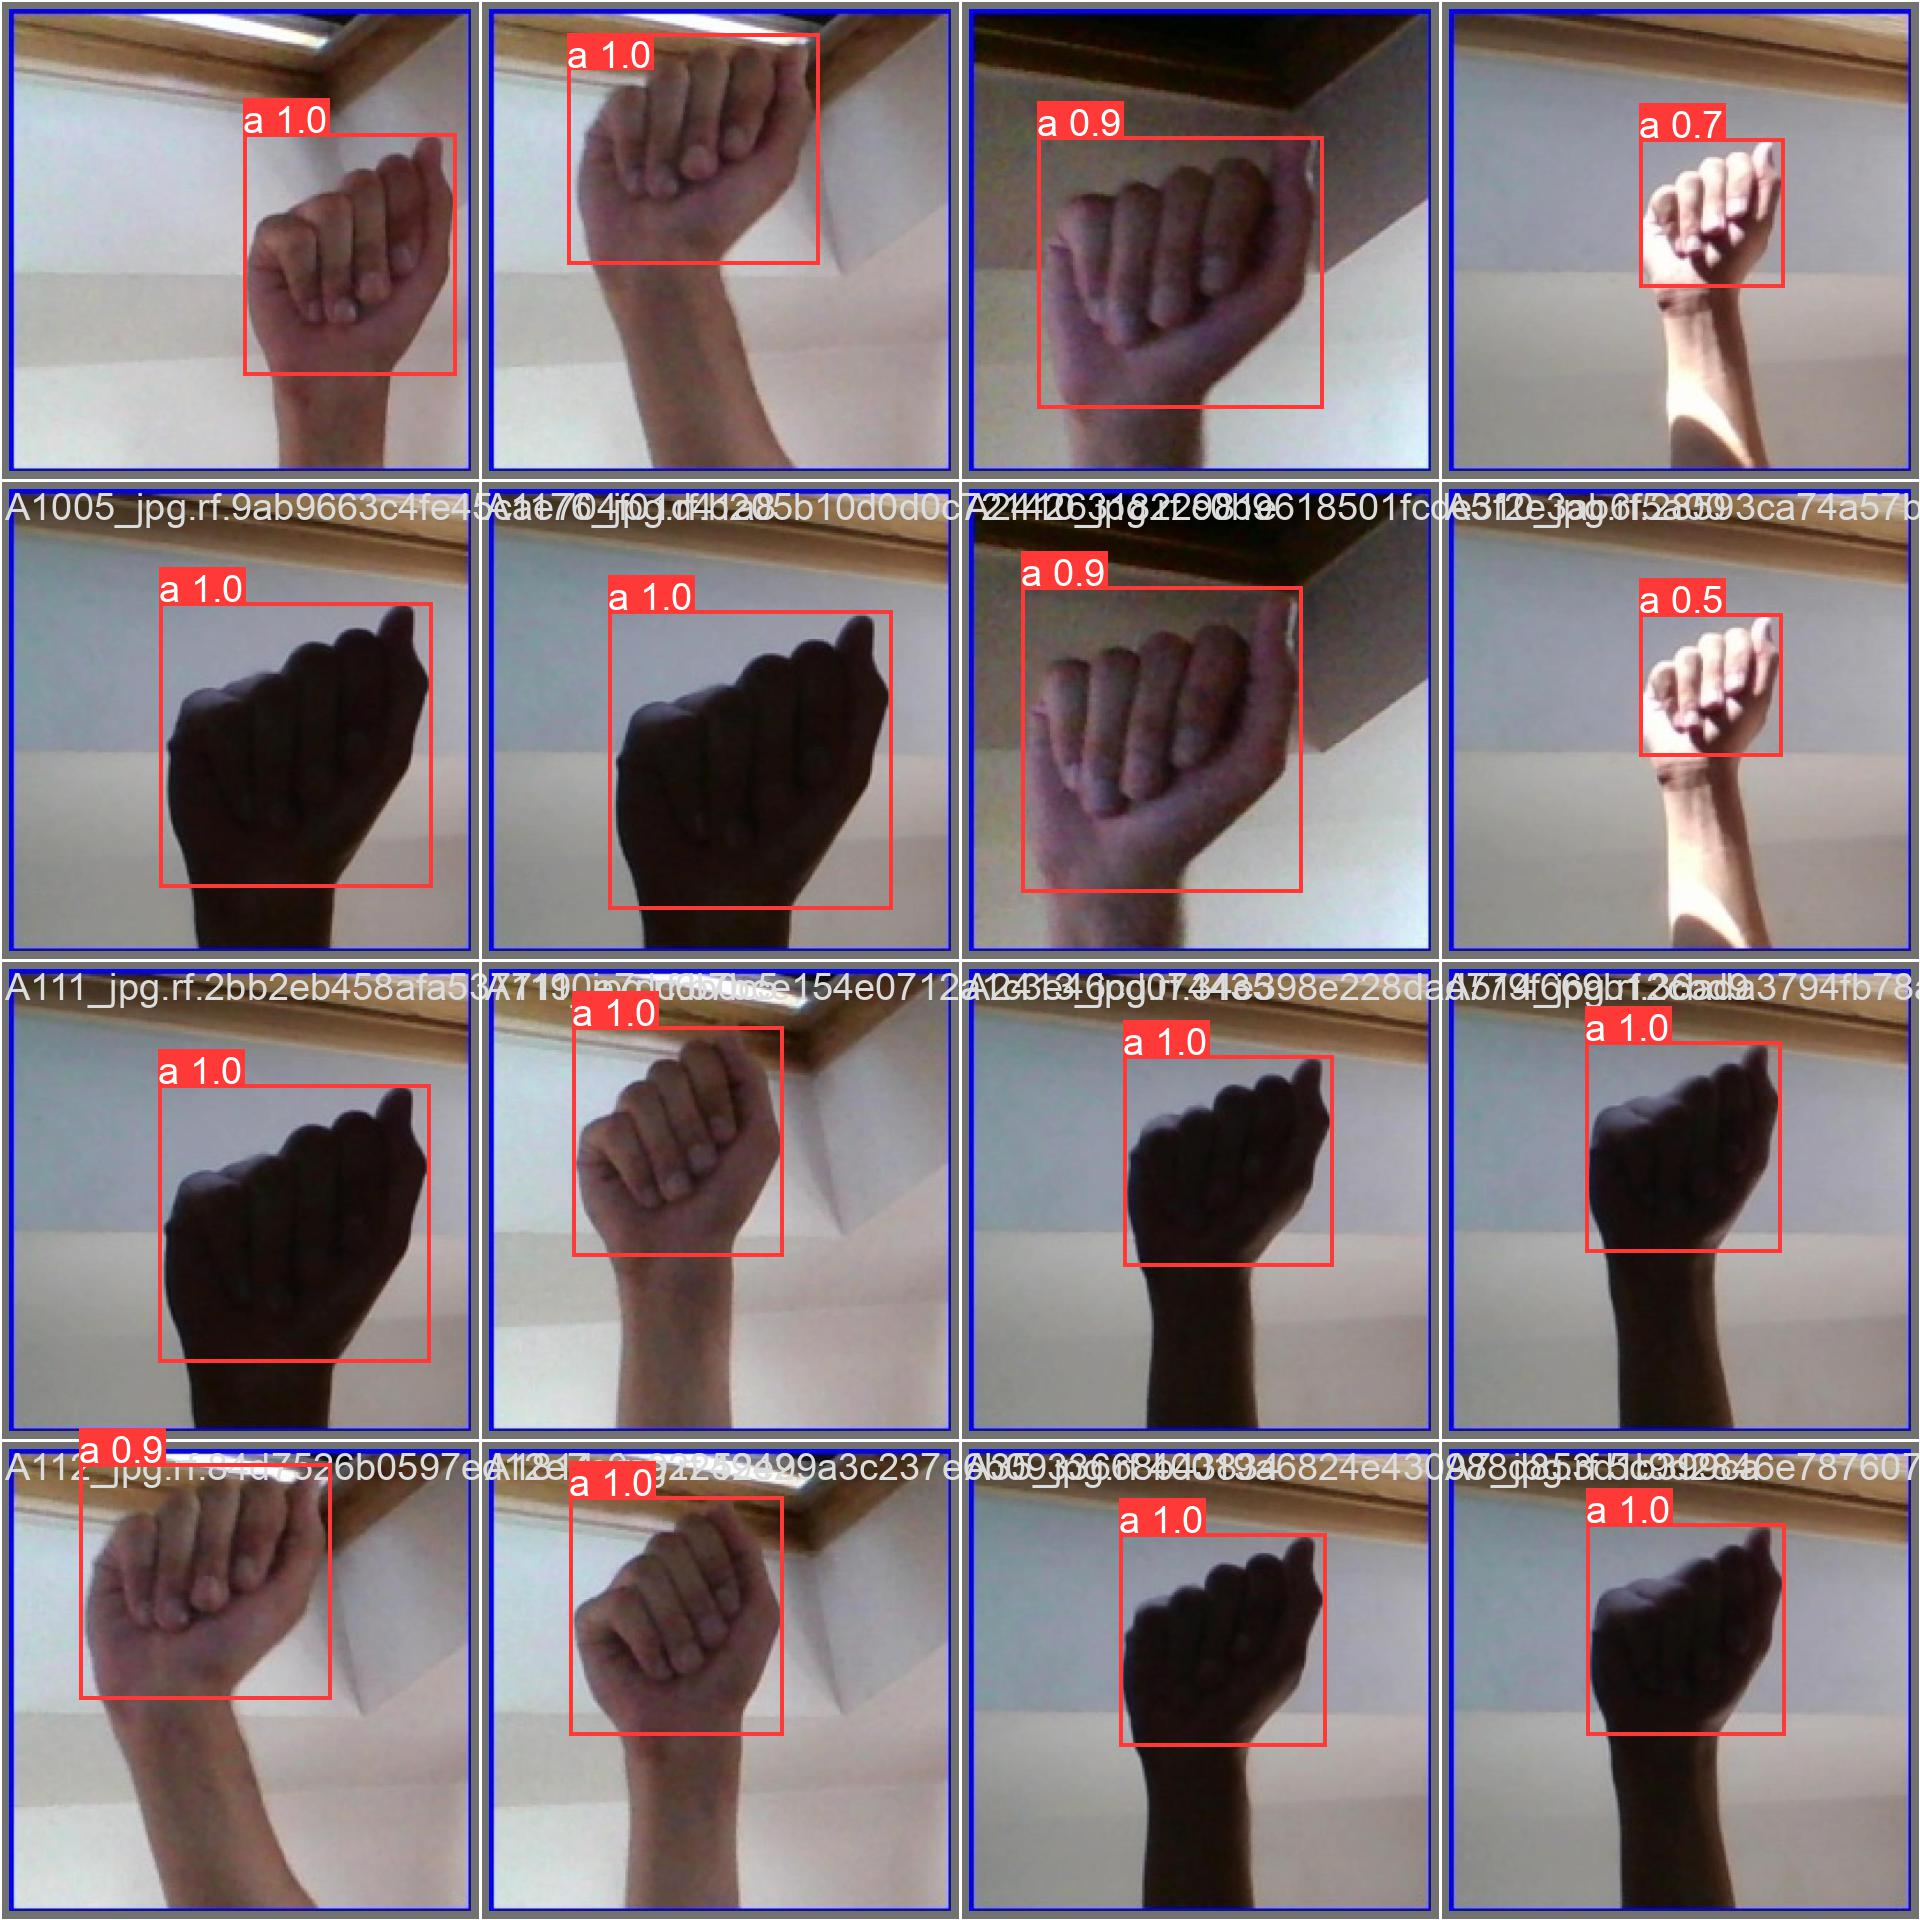

In [ ]:
%cd {Home}
Image(filename=f'{Home}/runs/detect/train7/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {Home}
!yolo task=detect mode=val model={Home}/runs/detect/train7/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/LettersDetector-4/valid/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100% 16/16 [00:00<?, ?it/s]
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:21<00:00, 21.39s/it]
                   all         16         16      0.997          1      0.995      0.892
Speed: 9.4ms pre-process, 1314.1ms inference, 0.0ms loss, 0.6ms post-process per image


In [ ]:
%cd {Home}
!yolo task=detect mode=predict model={Home}/runs/detect/train7/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/9 /content/datasets/LettersDetector-4/test/images/A1006_jpg.rf.7f276bb49f358bd6419358f21d3d8563.jpg: 800x800 1 a, 959.7ms
image 2/9 /content/datasets/LettersDetector-4/test/images/A1171_jpg.rf.61b752fd65523a0e34a3095c290eaf1f.jpg: 800x800 1 a, 899.5ms
image 3/9 /content/datasets/LettersDetector-4/test/images/A1_jpg.rf.10e710cc5a0bbaaa3c96124cbe5d300d.jpg: 800x800 1 a, 896.5ms
image 4/9 /content/datasets/LettersDetector-4/test/images/A33_jpg.rf.582b4140d957df60106577a097f9dcfb.jpg: 800x800 1 a, 921.9ms
image 5/9 /content/datasets/LettersDetector-4/test/images/A38_jpg.rf.df608a9159929db819ce3e9699eacddf.jpg: 800x800 1 a, 891.7ms
image 6/9 /content/datasets/LettersDetector-4/test/images/A3_jpg.rf.aac46969d4bcfba7bf2270d4d5d565ae.jpg: 800x800 1 a, 904.8ms
image 7/9 /content/datasets/LettersDetector-4/test/images/A4_jpg.rf.a86ac2c3f

**Results :**

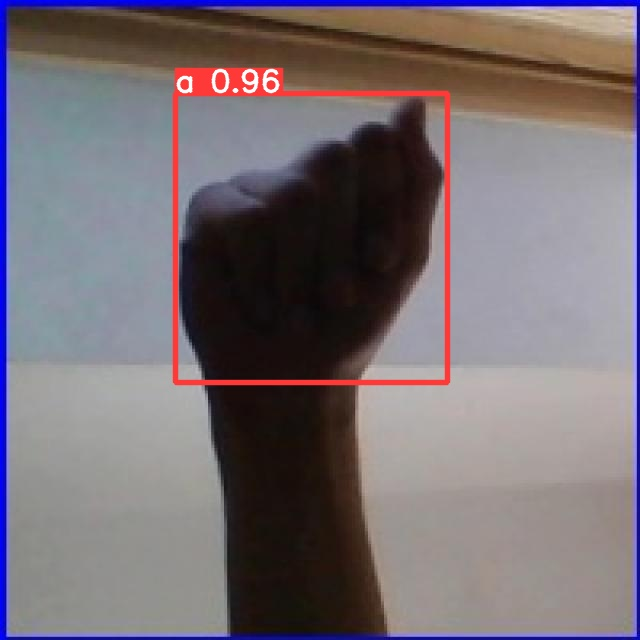

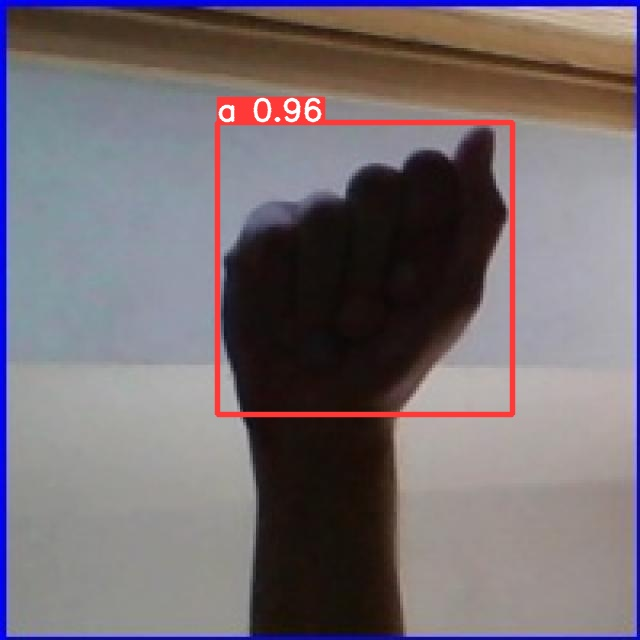

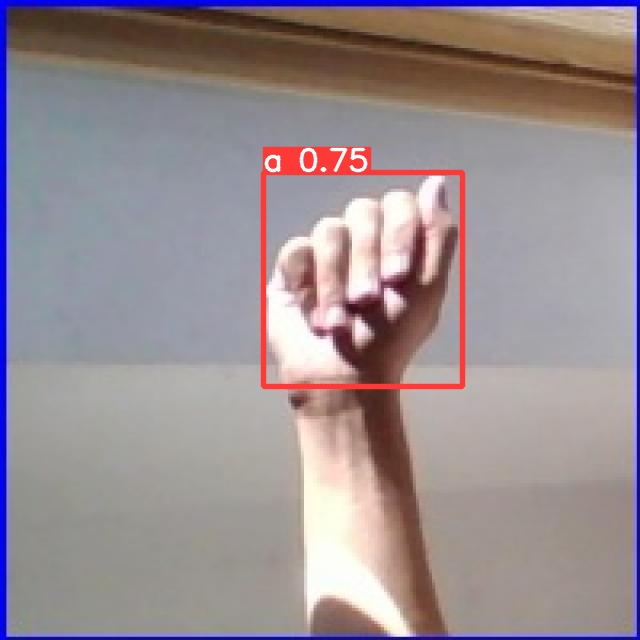

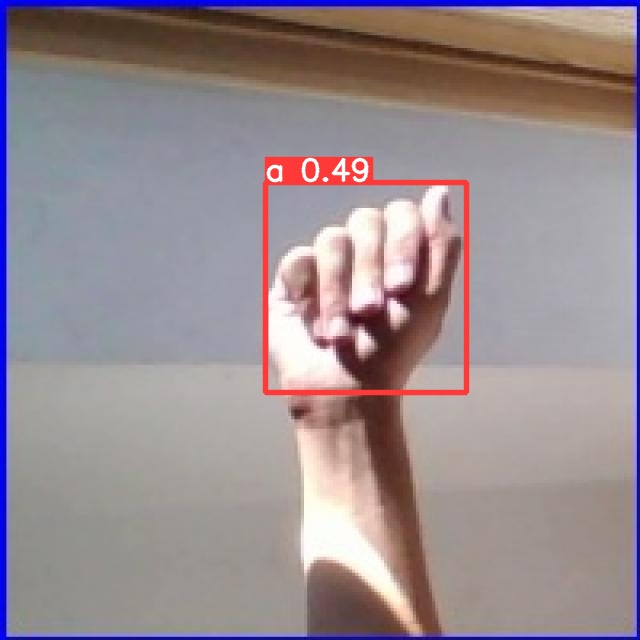

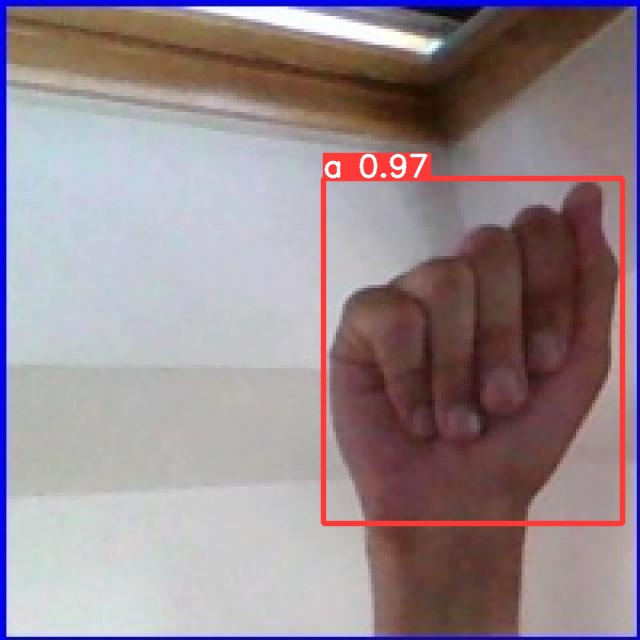

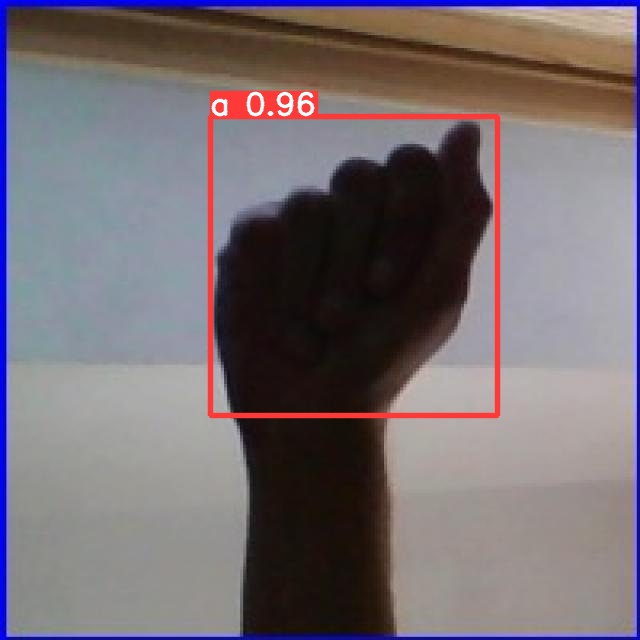

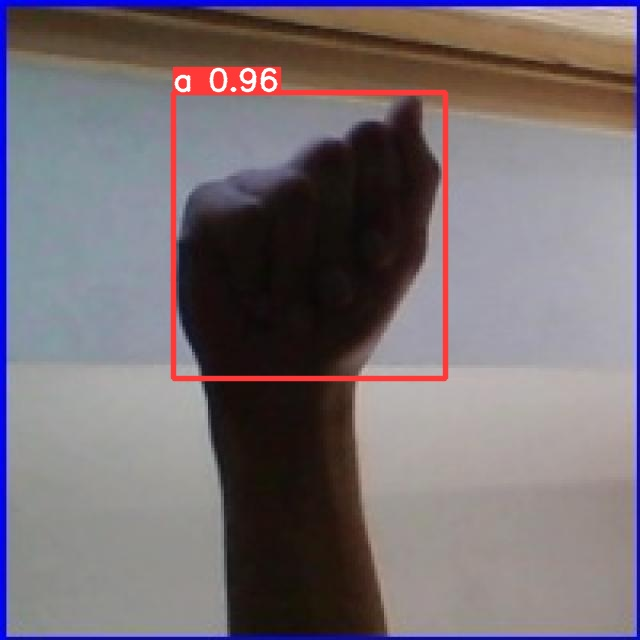

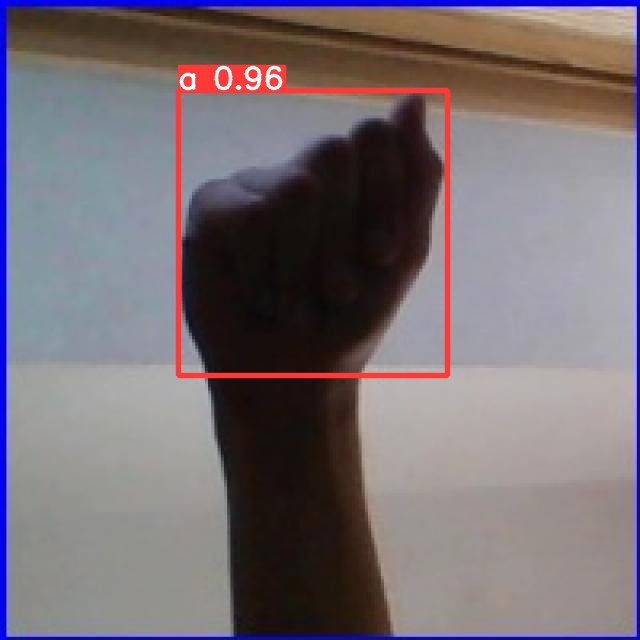

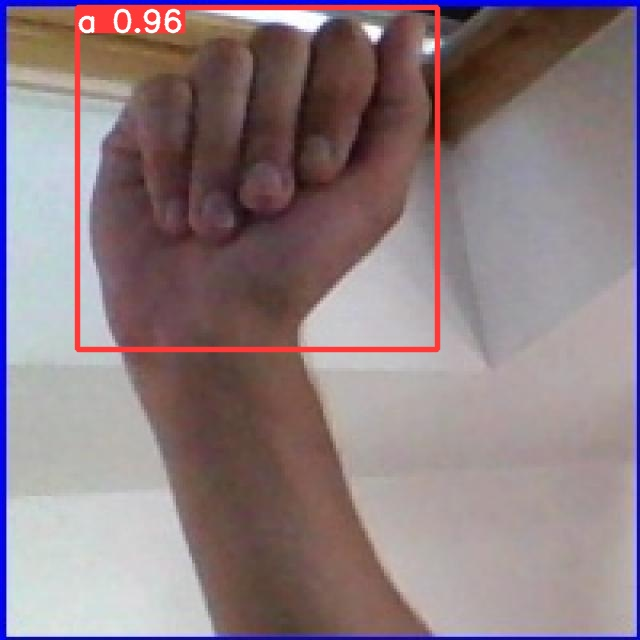

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{Home}/runs/detect/predict9/*.jpg')[:9]:
      display(Image(filename=image_path, width=600))
      print("\n")

**My Photo :**

In [ ]:
%cd {Home}
!yolo task=detect mode=predict model={Home}/runs/detect/train7/weights/best.pt conf=0.25 source='https://www.linkpicture.com/q/My_Hand.jpg' save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
100% 582k/582k [00:02<00:00, 249kB/s]
image 1/1 /content/My_Hand.jpg: 800x800 1 a, 1078.2ms
Speed: 5.1ms pre-process, 1078.2ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict10


/content


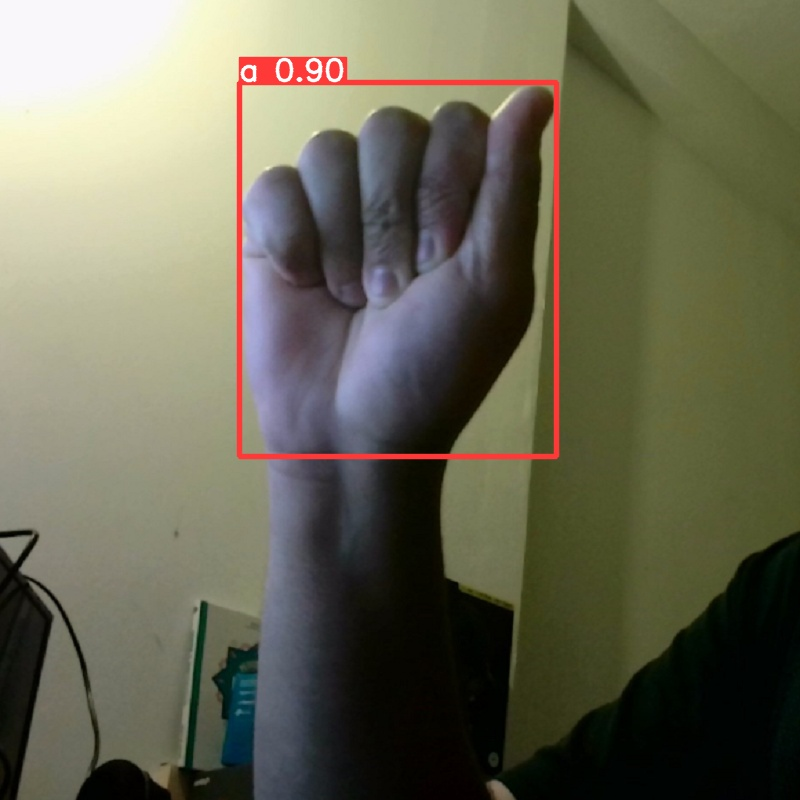

In [ ]:
#Affichage
%cd {Home}
Image(filename='runs/detect/predict10/My_Hand.jpg', height=600)